In [1]:
import numpy as np
import pandas as pd
import pickle, os, csv, math, time, joblib
from joblib import Parallel, delayed
import datetime as dt
from datetime import date, datetime, timedelta
from collections import Counter
import copy as cp
import tqdm
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import log_loss, f1_score, precision_score, recall_score, accuracy_score
#import matplotlib.pyplot as plt
#import matplotlib.ticker as ticker
import collections 
#import shap
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
np.seterr(all="ignore")
import matplotlib.pyplot as plt
import tqdm
import math
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import json
import util as util_fqi
import sys
sys.path.append('models/')
from lmmfqi import LMMFQIagent
from fqi import FQIagent
from cfqi import CFQIagent

In [2]:
train_tuples, test_tuples = util_fqi.generate_tuples()

100%|██████████| 100/100 [00:01<00:00, 74.99it/s]


Learning policy
Run 0 :
Initialize: get batch, set initial Q
Learn policy
Opta:  [2 2 2 ... 1 0 0]


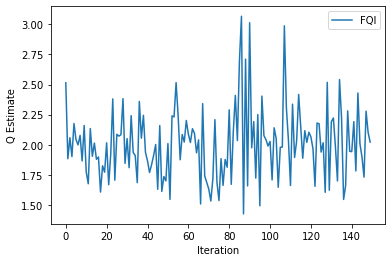

In [3]:
fqi_agent = FQIagent(train_tuples=train_tuples, test_tuples=test_tuples)
Q_dist = fqi_agent.runFQI(repeats=1)
plt.plot(Q_dist, label= "FQI")
plt.xlabel("Iteration")
plt.ylabel("Q Estimate")
plt.legend()
plt.show()

Learning policy
Run 0 :
Initialize: get batch, set initial Q
Learn policy
Opta:  [0 2 2 ... 2 0 0]


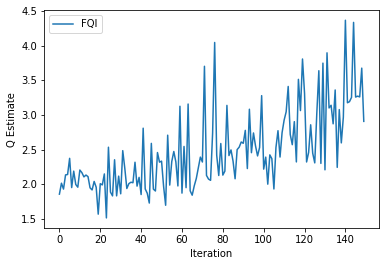

In [4]:
cfqi_agent = CFQIagent(train_tuples=train_tuples, test_tuples=test_tuples)
Q_dist = cfqi_agent.runFQI(repeats=1)
plt.plot(Q_dist, label= "FQI")
plt.xlabel("Iteration")
plt.ylabel("Q Estimate")
plt.legend()
plt.show()

In [ ]:
lmm_agent = LMMFQIagent(train_tuples=train_tuples, test_tuples=test_tuples)
Q_dist = lmm_agent.runFQI(repeats=1)
plt.plot(Q_dist, label= "FQI")
plt.xlabel("Iteration")
plt.ylabel("Q Estimate")
plt.legend()
plt.show()

Learning policy
Run 0 :
Initialize: get batch, set initial Q
Optimization terminated successfully.
         Current function value: 14.967560
         Iterations: 75
         Function evaluations: 2106
         Gradient evaluations: 78
         Current function value: 357.607314
         Iterations: 88
         Function evaluations: 2700
         Gradient evaluations: 100
         Current function value: 3401.549512
         Iterations: 91
         Function evaluations: 3348
         Gradient evaluations: 124
Optimization terminated successfully.
         Current function value: 33.454664
         Iterations: 72
         Function evaluations: 2025
         Gradient evaluations: 75
         Current function value: 1291.917990
         Iterations: 131
         Function evaluations: 5384
         Gradient evaluations: 199
         Current function value: 3372.889806
         Iterations: 76
         Function evaluations: 2295
         Gradient evaluations: 85
         Current function valu

         Current function value: 17128.269872
         Iterations: 135
         Function evaluations: 5275
         Gradient evaluations: 195
         Current function value: 25308.166320
         Iterations: 73
         Function evaluations: 2376
         Gradient evaluations: 88
         Current function value: 24284.716616
         Iterations: 76
         Function evaluations: 2646
         Gradient evaluations: 98
         Current function value: 28128.688159
         Iterations: 83
         Function evaluations: 2835
         Gradient evaluations: 105
         Current function value: 27561.696503
         Iterations: 106
         Function evaluations: 3267
         Gradient evaluations: 121
         Current function value: 42680.310349
         Iterations: 65
         Function evaluations: 2079
         Gradient evaluations: 77
         Current function value: 29646.388256
         Iterations: 92
         Function evaluations: 3213
         Gradient evaluations: 119
         Curre

In [ ]:
# Test out on each test tuple
# FQI, CFQI, Oracle, Random
algos = ['fqi', 'cfqi', 'lmmfqi', 'oracle', 'random']
overall_reward = {}
for alg in algos:
    overall_reward[alg] = []
for k, pat in enumerate(tqdm.tqdm(range(num_patients))):
    
    flip = np.random.choice(2)
    if flip == 0:
        ds = 'foreground'
    else:
        ds = 'background'
    # Generate a random initial state
    s = np.random.normal(mu, sigma, (10, 1))
    
    val_rewards = {}
    for alg in algos:
        val_rewards[alg] = []
    
    
    # Generate all of the tuples for this patient
    for i in range(num_samples):
        s = s.T
        # FQI agent
        fqi_action = fqi_agent.piE.predict(s)
        if fqi_action[0] > 3:
            fqi_action[0] = 3
        fqi_action = actions[round(fqi_action[0])]
        fqi_action = np.reshape(fqi_action, (2, 1))
        s_a = np.concatenate((s.T, fqi_action))
        val_rewards['fqi'].append(np.dot(reward_function.T, s_a)[0])


        # CFQI agent
        cfqi_action = cfqi_agent.piE.predict(s)
        if cfqi_action[0] > 3:
            cfqi_action[0] = 3
        cfqi_action = actions[round(cfqi_action[0])]
        cfqi_action = np.reshape(cfqi_action, (2, 1))
        s_a = np.concatenate((s.T, cfqi_action))
        val_rewards['cfqi'].append(np.dot(reward_function.T, s_a)[0])
        
        # LMMFQI agent
        lmmfqi_action = lmm_agent.piE.predict(s)
        if lmmfqi_action[0] > 3:
            lmmfqi_action[0] = 3
        lmmfqi_action = actions[round(lmmfqi_action[0])]
        lmmfqi_action = np.reshape(lmmfqi_action, (2, 1))
        s_a = np.concatenate((s.T, lmmfqi_action))
        val_rewards['lmmfqi'].append(np.dot(reward_function.T, s_a)[0])
        


        # Oracle
        all_rewards = []
        for j, a in enumerate(actions):
            a = np.asarray(a)
            a = np.reshape(a, (2, 1))
            s_a = np.concatenate((s.T, a))
            reward = np.dot(reward_function.T, s_a)
            all_rewards.append(reward)

        all_rewards = np.asarray(all_rewards)
        oracle_action = actions[np.argmax(all_rewards)]
        val_rewards['oracle'].append(np.max(all_rewards))


        # Random action
        random_action = np.asarray(actions[np.random.choice(3)])
        random_action = np.reshape(random_action, (2, 1))
        s_a = np.concatenate((s.T, random_action))
        val_rewards['random'].append(np.dot(reward_function.T, s_a)[0])
        
        if ds == 'foreground':
            t_m = transition_foreground
        else:
            t_m = transition_background
        ns = np.matmul(s_a.T, t_m) / np.linalg.norm(np.matmul(s_a.T, t_m), ord=2)
        ns = np.add(ns, np.random.normal(0, 0.5, (1, 10))) # Add noise
        s = ns.T
    
    plt.title("Rewards for trajectory: " + str(k))
    plt.xlabel("Step")
    plt.ylabel("Cumulative Reward")
    x = [i for i in range(num_samples)]
    rewards_fqi = util_fqi.cumulative_reward(val_rewards['fqi'])
    overall_reward['fqi'].append(rewards_fqi[-1])
    rewards_cfqi = util_fqi.cumulative_reward(val_rewards['cfqi'])
    overall_reward['cfqi'].append(rewards_cfqi[-1])
    rewards_lmmfqi = util_fqi.cumulative_reward(val_rewards['lmmfqi'])
    overall_reward['lmmfqi'].append(rewards_lmmfqi[-1])
    rewards_oracle = util_fqi.cumulative_reward(val_rewards['oracle'])
    overall_reward['oracle'].append(rewards_oracle[-1])
    rewards_random = util_fqi.cumulative_reward(val_rewards['random'])
    overall_reward['random'].append(rewards_random[-1])

    plt.plot(x, rewards_fqi, label="FQI")
    plt.plot(x, rewards_lmmfqi, label='CFQI')
    plt.plot(x, rewards_cfqi, label='LMMFQI')
    plt.plot(x, rewards_oracle, label='Oracle')
    plt.plot(x, rewards_random, label='Random')
    plt.legend()
    plt.show()

In [ ]:
plt.title("Cumulative Reward across patients and algorithms")
sns.stripplot(overall_reward['fqi'], color='r', label='FQI')
sns.stripplot(overall_reward['cfqi'], color='g', label='CFQI')
sns.stripplot(overall_reward['lmmfqi'], color='y', label='LMMFQI')
sns.stripplot(overall_reward['random'], color='b', label='Random')
sns.stripplot(overall_reward['oracle'], color='m', label="Oracle")
plt.legend()
plt.xlabel("Cumulative Reward")

In [ ]:
#_, axs = plt.subplots(2, 2)
fig = plt.figure(figsize=(10,10))
#sns.set_theme(style="whitegrid")
plt.boxplot(x=[np.asarray(overall_reward['fqi']).squeeze().tolist(), np.asarray(overall_reward['cfqi']).squeeze().tolist(), np.asarray(overall_reward['random']).squeeze().tolist(), np.asarray(overall_reward['oracle']).squeeze().tolist()])# axs[0, 1].boxplot(x=np.asarray(overall_reward['cfqi']).squeeze().tolist())
# axs[1, 0].set_title("Random")
# axs[1, 0].boxplot(x=np.asarray(overall_reward['random']).squeeze().tolist())
# axs[1, 1].set_title("Oracle")
# axs[1, 1].boxplot(x=np.asarray(overall_reward['oracle']).squeeze().tolist())